形态学

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

In [2]:
filename = 'D:\code\pytorch_learn\data\mao.jpg'

形态学，即数学形态学（Mathematical Morphology），是图像处理过程中一个非常重要的研究方向。形态学主要从图像内提取分量信息，该分量信息通常对于表达和描绘图像的形状具有重要意义，通常是图像理解时所使用的最本质的形状特征.

形态学操作主要包含：腐蚀、膨胀、开运算、闭运算、形态学梯度（MorphologicalGradient）运算、顶帽运算（礼帽运算）、黑帽运算等操作.

腐蚀是最基本的形态学操作之一，它能够将图像的边界点消除，使图像沿着边界向内收缩，也可以将小于指定结构体元素的部分去除。

![腐蚀](https://res.weread.qq.com/wrepub/epub_26297910_238)

在OpenCV中，使用函数cv2.erode()实现腐蚀操作.

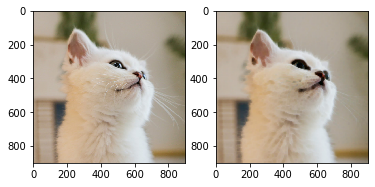

In [7]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

kernel = np.full((9, 9), 1, dtype=np.uint8)
dst = cv2.erode(img, kernel)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

膨胀操作是形态学中另外一种基本的操作。膨胀操作和腐蚀操作的作用是相反的，膨胀操作能对图像的边界进行扩张.

膨胀操作将与当前对象（前景）接触到的背景点合并到当前对象内，从而实现将图像的边界点向外扩张。如果图像内两个对象的距离较近，那么在膨胀的过程中，两个对象可能会连通在一起。膨胀操作对填补图像分割后图像内所存在的空白相当有帮助.

![膨胀](https://res.weread.qq.com/wrepub/epub_26297910_246)

在OpenCV内，采用函数cv2.dilate()实现对图像的膨胀操作.

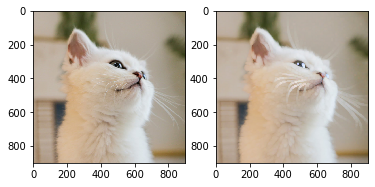

In [8]:
img = np.array(Image.open(filename))
plt.subplot(1, 2, 1); plt.imshow(img)

kernel = np.full((9, 9), 1, dtype=np.uint8)
dst = cv2.dilate(img, kernel)
plt.subplot(1, 2, 2); plt.imshow(dst)

plt.show()

腐蚀操作和膨胀操作是形态学运算的基础，将腐蚀和膨胀操作进行组合，就可以实现开运算、闭运算（关运算）、形态学梯度（Morphological Gradient）运算、礼帽运算（顶帽运算）、黑帽运算、击中击不中等多种不同形式的运算。

OpenCV提供了函数cv2.morphologyEx()来实现上述形态学运算.

操作类型 op
![操作类型](https://res.weread.qq.com/wrepub/epub_26297910_252)

开运算进行的操作是先将图像腐蚀，再对腐蚀的结果进行膨胀。开运算可以用于去噪、计数等。

![](https://res.weread.qq.com/wrepub/epub_26297910_261)

闭运算是先膨胀、后腐蚀的运算，它有助于关闭前景物体内部的小孔，或去除物体上的小黑点，还可以将不同的前景图像进行连接。

![](https://res.weread.qq.com/wrepub/epub_26297910_256)

形态学梯度运算是用图像的膨胀图像减腐蚀图像的操作，该操作可以获取原始图像中前景图像的边缘。
![](https://res.weread.qq.com/wrepub/epub_26297910_259)

礼帽运算是用原始图像减去其开运算图像的操作。礼帽运算能够获取图像的噪声信息，或者得到比原始图像的边缘更亮的边缘信息。

![](https://res.weread.qq.com/wrepub/epub_26297910_261)

黑帽运算是用闭运算图像减去原始图像的操作。黑帽运算能够获取图像内部的小孔，或前景色中的小黑点，或者得到比原始图像的边缘更暗的边缘部分。

![](https://res.weread.qq.com/wrepub/epub_26297910_264)

在进行形态学操作时，必须使用一个特定的核（结构元）。该核可以自定义生成，也可以通过函数cv2.getStructuringElement()构造。函数cv2.getStructuringElement()能够构造并返回一个用于形态学处理所使用的结构元素.

![](https://res.weread.qq.com/wrepub/epub_26297910_267)

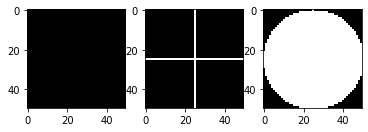

In [20]:
kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (50, 50))
kernel_3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
plt.subplot(1, 3, 1); plt.imshow(kernel_1*255, cmap='gray')
plt.subplot(1, 3, 2); plt.imshow(kernel_2*255, cmap='gray')
plt.subplot(1, 3, 3); plt.imshow(kernel_3*255, cmap='gray')